# Analisis de las diferentes Vairables climatologicas en Cali desde 1990 a 2022
## Analisis de la radiacion solar
En esta celda se debe explicar sobre la radiacion solar, creo? 

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

# Cargar datos
df_solar = pd.read_csv('/home/hades66/zzaingt-home/AnalsisVisualizacionDatos/PFClimate/Data/clima-parameters.csv')

# Obtener lista con datos unicos de parametros
variables_climatologicas = sorted(df_solar['PARAMETER'].unique())
años_disponibles = sorted(df_solar['YEAR'].unique())

# main visualization
def visualizar_radiacion_solar(change):
    # Obtener valores de los widgets
    parametro = parametro_widget.value
    años = años_widget.value
    # Limpiar la salida anterior
    clear_output(wait=True)
    # Mostrar los widgets de nuevo
    display(widget_layout)
    
    # meses
    meses = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    
    # Crear figura
    fig = go.Figure()
    
    # Agregar una línea para cada año seleccionado
    for year in años:
        data_year = df_solar[(df_solar['YEAR'] == year) & (df_solar['PARAMETER'] == parametro)]
        if not data_year.empty:
            valores = data_year[meses].values.flatten()
            
            fig.add_trace(go.Scatter(
                x=meses,
                y=valores,
                mode='lines+markers',
                name=f'Año {year}',
                hovertemplate="Mes: %{x}<br>" +
                            "Valor: %{y:.2f}<br>" +
                            f"Año: {year}<br>" +
                            "<extra></extra>"
            ))
    
    # Actualizar el diseño del gráfico
    fig.update_layout(
        title={
            'text': f'Radiación Solar - {parametro}',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=20)
        },
        xaxis_title="Mes",
        yaxis_title=f"{parametro}",
        hovermode='x unified',
        template='plotly_white',
        height=600,
        width=1000,
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=1.05
        ),
        showlegend=True
    )
    
    # Agregar grid
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGray')
    
    # Mostrar el gráfico
    display(fig)
    
    # Mostrar estadísticas
    mostrar_estadisticas(parametro, años)

def mostrar_estadisticas(parametro, años):
    meses = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    stats_list = []
    
    for year in años:
        data_year = df_solar[(df_solar['YEAR'] == year) & (df_solar['PARAMETER'] == parametro)]
        if not data_year.empty:
            valores = data_year[meses].values.flatten()
            stats = {
                'Año': year,
                'Promedio': valores.mean(),
                'Máximo': valores.max(),
                'Mínimo': valores.min(),
                'Desviación Estándar': valores.std()
            }
            stats_list.append(stats)
    
    if stats_list:  # Muestra solo si hay datos
        stats_df = pd.DataFrame(stats_list)
        stats_df = stats_df.round(2)
        display(stats_df)

# Crear widgets
parametro_widget = widgets.Dropdown(
    options=variables_climatologicas,
    description='Parámetro:',
    style={'description_width': 'initial'},
    layout={'width': 'auto'}
)

años_widget = widgets.SelectMultiple(
    options=años_disponibles,
    description='Años:',
    style={'description_width': 'initial'},
    layout={'width': 'auto'}
)

# Agregar observadores a los widgets
parametro_widget.observe(visualizar_radiacion_solar, names='value')
años_widget.observe(visualizar_radiacion_solar, names='value')

# Crear layout de widgets
widget_layout = widgets.VBox([
    widgets.HBox([parametro_widget, años_widget])
])

# Mostrar solo los widgets inicialmente
display(widget_layout)

,Año,Promedio,Máximo,Mínimo,Desviación Estándar
0,2016,17.63,19.40,16.29,0.89
1,2017,16.70,17.08,16.34,0.25
2,2018,16.67,17.12,16.09,0.32


In [ ]:
import pandas as pd
df = pd.read_csv('/home/hades66/zzaingt-home/AnalsisVisualizacionDatos/PFClimate/Data/clima-parameters.csv') # extraer datos

parametro = 'ALLSKY_SFC_LW_DWN'
df_parametro = df[df['PARAMETER'] == parametro]

year_value_max = df_parametro.loc[df_parametro['ANN'].idxmax()]

print(f"Año con valor máximo para {parametro}: {year_value_max['YEAR']} con un valor de {year_value_max['ANN']}")
print(df_parametro['ANN'].describe())



Año con valor máximo para ALLSKY_SFC_LW_DWN: 2002 con un valor de 379.5
count     33.000000
mean     372.312424
std        7.281641
min      357.260000
25%      365.210000
50%      375.680000
75%      377.890000
max      379.500000
Name: ANN, dtype: float64


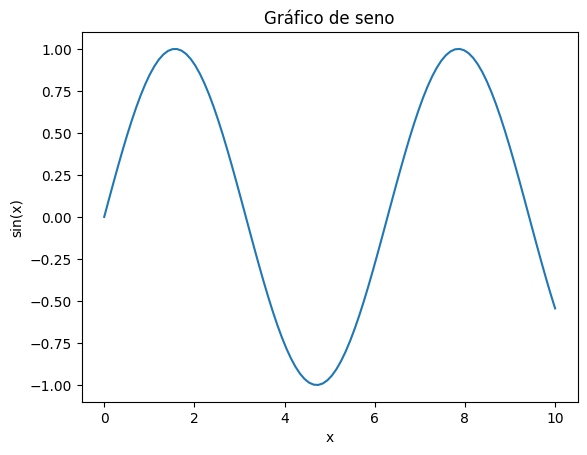

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Crear el gráfico
plt.plot(x, y)

# Agregar título y etiquetas
plt.title("Gráfico de seno")
plt.xlabel("x")
plt.ylabel("sin(x)")

# Mostrar el gráfico
plt.show()
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)